In [ ]:
# colab에서 구글 드라이브 연동
# from google.colab import drive
# drive.mount("/content/drive")

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
names1880=pd.read_csv("babynames/yob1880.txt", header=None, names=['name', 'sex', 'births'])
names1880
#퀴즈3
#names1880에서 성별에 따른 태어난 아이들 수 수의 합계 출력
names1880.groupby('sex').births.sum()

years=range(1880,2011)
pieces=[]



In [9]:
for year in years:
    path="babynames/yob%d.txt" % year
    frame=pd.read_csv(path, header=None, names=['name', 'sex', 'births'])
    frame['year']=year
    pieces.append(frame)
    #print(frame)
    #print(path)

In [10]:
len(pieces[0][pieces[0].sex=='F']) #942
len(pieces[130][pieces[130].sex=='F']) #19698
#1880년 여자 아이들의 이름의 종류:942,
#2010년 여자 아이들의 이름의 종류:19698
#이름이 매우 다양해졌다
#시각화()

19698

In [11]:
len(pieces)

131

시대별로 특정 이름이 차지하는 비율 -> 이름이 흔한지 여부 확인  
이름의 상대 순위  
각 연도별로 가장 인기있는 이름?  
가장 많이 증가하거나 감소한 이름  
모음, 자음, 길이, 철자 변화, 첫글자와 끝글자 등 이름 유행 분석
유명인의 이름, 인구통계학적 변화


In [12]:
names=pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


<AxesSubplot:xlabel='year'>

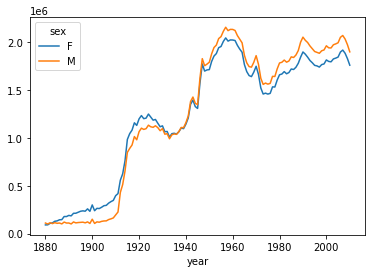

In [14]:
total_births=names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births.plot()

In [15]:
#prop컬럼(각 이름이 전체(해당 연도) 출생수에서 차지하는 비율) 추가
# names
# 1880 남자 100명 중 마이클 5명 => 0.05
# ...
# 2010 남자...
# .... 여자...
# names를 연도와 성별로 그룹화(그룹 수= 131 * 2 = 262개 그룹)
# 262개 각각의 그룹에 대해 모든 이름에 대한 출생수 비율

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [20]:
def add_prop(group):
    group['prop']=group.births/group.births.sum()
    return group
    
names=names.groupby(['year','sex']).apply(add_prop)

#names.groupby(['year','sex']).births.sum() #262개 그룹
#names.groupby(['year','sex']).births

In [22]:
names

# 0	Mary	F	7065	1880	0.077643
# 1880년에 태어난 여자 아이 이름 중에서 Mary라는 이름이 차지하는 비율
# 약 7.7%

#names에서 연도와 성별을 기준으로 그룹화한 다음 prop의 합계 출력
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [51]:
#각 연도별/성별에 따른 선호하는 이름 1000개 추출
def get_top1000(group):
    return group.sort_values(by='births',ascending=False)[:1000]

top1000=names.groupby(['year','sex']).apply(get_top1000)

In [52]:
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2010 M   1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

In [59]:
top1000.reset_index(inplace=True, drop=True)
# 1000개 * 262 그룹 = 262000개 이름
# drop=True 옵션은 기존 인덱스를 drop하고 새로운 인덱스를 부여(0~)
# inplace=True 옵션은 reset결과를 top1000에 반영

In [60]:
top1000
# top1000.set_index(['births', 'sex'], drop=True)

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [63]:
boys=top1000[top1000.sex=='M']
girls=top1000[top1000.sex=='F']

In [64]:
boys

,name,sex,births,year,prop
942,John,M,9655,1880,0.087381
943,William,M,9533,1880,0.086277
944,James,M,5927,1880,0.053641
945,Charles,M,5348,1880,0.048401
946,George,M,5126,1880,0.046392
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [67]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [68]:
top1000
total_births=top1000.pivot_table('births',index='year',columns='name',aggfunc=sum)
#연도와 이름에 대한 전체 출생수

In [69]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [75]:
subset=total_births[['John','Harry','Mary','Marilyn', 'Sophia']]
subset

name,John,Harry,Mary,Marilyn,Sophia
year,,,,,
1880,9701.0,2158.0,7092.0,NaN,138.0
1881,8795.0,2002.0,6948.0,NaN,122.0
1882,9597.0,2246.0,8179.0,NaN,179.0
1883,8934.0,2116.0,8044.0,NaN,159.0
1884,9427.0,2338.0,9253.0,NaN,170.0
...,...,...,...,...,...
2006,15140.0,414.0,4073.0,596.0,13484.0
2007,14405.0,443.0,3665.0,597.0,17002.0
2008,13273.0,379.0,3478.0,543.0,16042.0


<AxesSubplot:xlabel='year'>

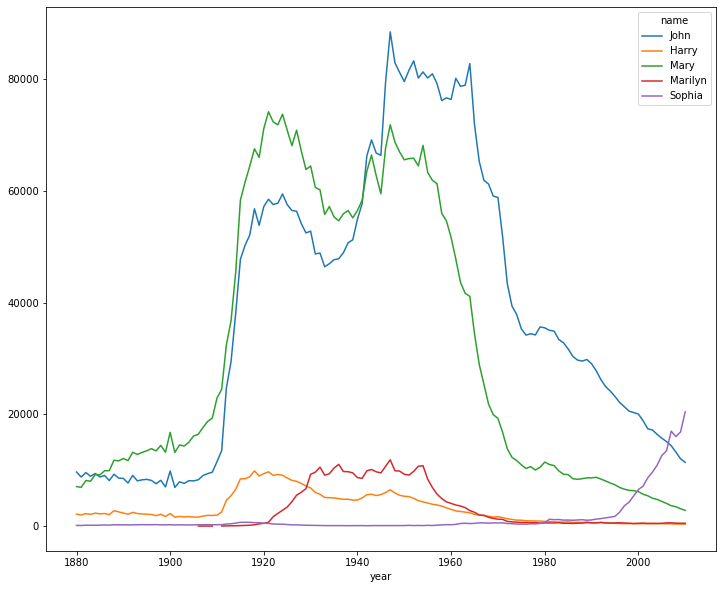

In [77]:
subset.plot(figsize=(12,10))

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>], dtype=object)

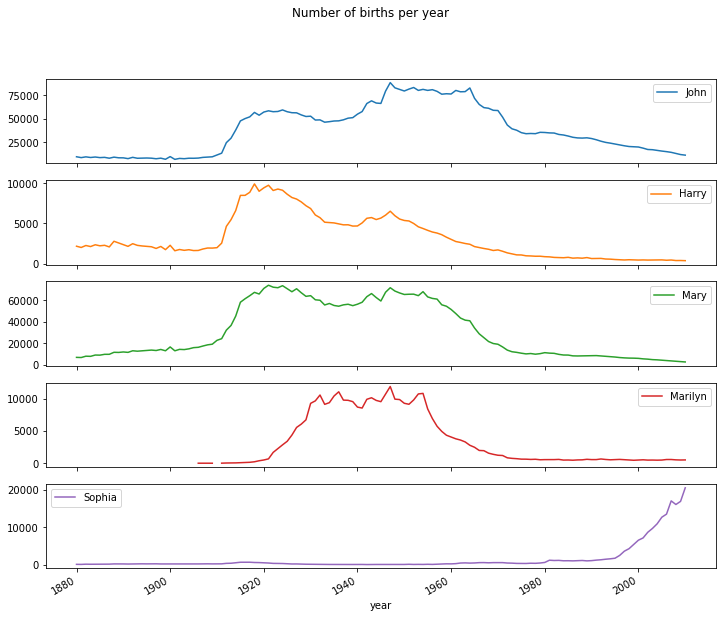

In [80]:
subset.plot(figsize=(12,10), subplots=True, title="Number of births per year")

In [81]:
#이름의 다양성 측정

In [82]:
top1000
#연도별/성별 prop합계 -> 값이 1(0)에 가깝다 => 이름이 흔하다(흔하지 않다)



,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [85]:
table=top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

<AxesSubplot:xlabel='year'>

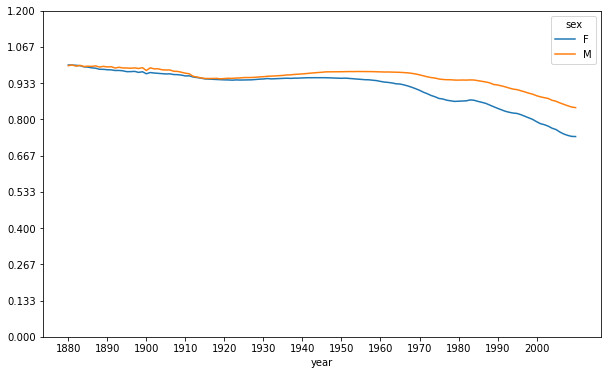

In [92]:
table.plot(figsize=(10,6), xticks=range(1880,2010,10), yticks=np.linspace(0,1.2,10))

In [93]:
#이름으로 정렬 -> 전체 출생수의 50%를 차지하는 이름의 종류 개수를 출력

In [98]:
boys
#1000 * 131 = 131000개(실제는 130997개)
df=boys[boys.year==2010]
#prop열의 누적합이 50%(0.5)가 되는 지점까지의 이름의 종류 개수
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [111]:
prop_cumsum=df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:117] #0~116번까지
#116번 index에서 0.5가 넘어감
prop_cumsum.values.searchsorted(0.5) #50%가 넘어가는 지점 index 116번

116

In [112]:
df=boys[boys.year==1900]
df

,name,sex,births,year,prop
40877,John,M,9834,1900,0.065319
40878,William,M,8580,1900,0.056990
40879,James,M,7246,1900,0.048129
40880,George,M,5405,1900,0.035901
40881,Charles,M,4102,1900,0.027246
...,...,...,...,...,...
41872,Theron,M,8,1900,0.000053
41873,Terrell,M,8,1900,0.000053
41874,Solon,M,8,1900,0.000053
41875,Rayfield,M,8,1900,0.000053


In [119]:
in1900=df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5)+1

25

In [118]:
in1900.iloc[24] #0.5036332478711958, 50%가 막 넘어가는 지점까지의 이름 종류 25가지

0.5036332478711958

In [128]:
def get_quantile_count(group, q=0.7):
    temp=group.sort_values(by='prop', ascending=False).prop.cumsum()
    return temp.values.searchsorted(q)+1

diversity=top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity=diversity.unstack('sex')
diversity

sex,F,M
year,,
1880,77,50
1881,77,50
1882,78,53
1883,80,51
1884,82,55
...,...,...
2006,689,279
2007,731,293
2008,759,311


<AxesSubplot:xlabel='year'>

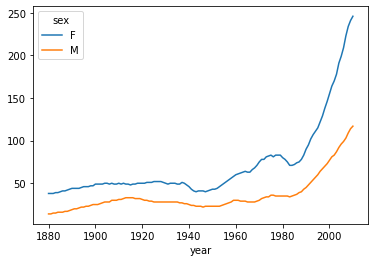

In [126]:
diversity.plot()

names

In [129]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [133]:
#시리즈에 저장된 문자열 각각에 대해 마지막 글자 추출
last_letters=names.name.map(lambda x: x[-1])
last_letters.name='last_letter'

In [134]:
last_letters

0          y
1          a
2          a
3          h
4          e
          ..
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: last_letter, Length: 1690784, dtype: object

In [137]:
table=names.pivot_table('births', index=last_letters, 
                  columns=['sex','year'], aggfunc=sum)
table

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4784.0   5567.0   5701.0   6602.0   6624.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2911.0   3527.0   3848.0   4808.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3576.0   3837.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2039.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2825.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2001      2002      2003   
last_letter                             ...                                 
a            48942.0  59442.0  58631.0  ...   39124.0   38815.0   37825.0   
b                NaN      NaN      NaN  ...   50950.0   49284.0   48065.0   
c                NaN      NaN      NaN  ...   27113.0   27238.0   27697.0   
d             1027.0   1298.0   1374.0  ...   60838.0   55829.0   53391.0   
e            54353.0  66750.0  66663.0  ...  145395.0  144651.0  144769.0   
f                NaN      NaN      NaN  ...    1758.0    1817.0    1819.0   
g               25.0     44.0     28.0  ...    2151.0    2084.0    2009.0   
h             7141.0   8630.0   8826.0  ...   85959.0   88085.0   88226.0   
i              105.0    141.0    134.0  ...   20980.0   23610.0   26011.0   
j                NaN      NaN      NaN  ...    1069.0    1088.0    1203.0   
k               19.0     21.0     22.0  ...   42477.0   42043.0   42296.0   
l             6175.0   7900.0   8395.0  ...  153648.0  153493.0  153862.0   
m               90.0    123.0    137.0  ...   41967.0   42663.0   42790.0   
n             5512.0   6833.0   7103.0  ...  616099.0  630322.0  663419.0   
o               97.0    134.0    142.0  ...   82146.0   83180.0   85423.0   
p                NaN      NaN      NaN  ...    3419.0    3157.0    2982.0   
q                NaN      NaN      NaN  ...     602.0     618.0     585.0   
r              910.0   1207.0   1214.0  ...  165377.0  164821.0  169878.0   
s             2803.0   3582.0   3569.0  ...  143791.0  139595.0  138632.0   
t             3140.0   3816.0   3784.0  ...

In [142]:
subtable=table.reindex(columns=[1910, 1930, 1960, 1980, 2010], level='year')
subtable

sex                 F                                                M  \
year             1910      1930      1960      1980      2010     1910   
last_letter                                                              
a            108376.0  288291.0  691247.0  627621.0  670605.0    977.0   
b                 NaN      20.0     694.0      79.0     450.0    411.0   
c                 5.0      14.0      49.0     404.0     946.0    482.0   
d              6750.0   12124.0    3729.0    2022.0    2607.0  22111.0   
e            133569.0  305386.0  435013.0  310447.0  313833.0  28655.0   
f                 NaN       NaN      20.0      14.0      97.0    152.0   
g                57.0      89.0     318.0     576.0     657.0    437.0   
h             20427.0   39447.0   73247.0   71251.0  133424.0   8848.0   
i               605.0    2209.0   80812.0   57507.0   55820.0    164.0   
j                 NaN       NaN       NaN       9.0     159.0      NaN   
k                48.0     235.0     315.0     878.0     626.0   7104.0   
l             17121.0   27898.0   68482.0   68555.0   46360.0  12626.0   
m               476.0    1552.0   17417.0    2327.0    4552.0  11272.0   
n             31412.0  120981.0  264258.0  157599.0  246631.0  27851.0   
o               658.0    4148.0    4932.0    3081.0    2187.0   3314.0   
p                 7.0      28.0      47.0      74.0      35.0    616.0   
q                 NaN       NaN       NaN       NaN      53.0      NaN   
r              5308.0   11449.0   13677.0   99299.0   31707.0  12522.0   
s             15477.0   76178.0   25810.0    9075.0   23451.0  25404.0   
t             10877.0   29445.0   30738.0    9183.0   13773.0  14153.0   
u               271.0     893.0    1161.0     319.0     734.0     24.0   
v                 NaN       NaN     122.0      12.0     205.0     22.0   
w                 8.0      57.0      63.0     438.0    2080.0   1229.0   
x                 6.0      33.0      74.0     155.0    1279.0    770.0   
y             43991.0  203613.0  308504.0  237326.0  205501.0  15021.0   
z               967.0    1431.0    1333.0    1008.0    1238.0     33.0   

sex                                                  
year             1930      1960      1980      2010  
last_letter                                          
a              3566.0    5204.0   42396.0   28438.0  
b              3019.0    3912.0   10139.0   38859.0  
c              1784.0   15476.0   30383.0   23125.0  
d            183033.0  262112.0  129375.0   44398.0  
e            131778.0  178823.0  112343.0  129012.0  
f               461.0    9224.0    1640.0    2255.0  
g              1390.0   20235.0    6547.0    2666.0  
h             47202.0   80841.0   64141.0   98090.0  
i               694.0    1286.0    5527.0   42956.0  
j                 NaN       NaN     263.0    1459.0  
k             33817.0  105315.0   58632.0   35198.0  
l             69544.0  223716.0  177099.0  133583.0  
m             53911.0   72139.0   50039.0   46808.0  
n            152510.0  325266.0  434883.0  688677.0  
o             20409.0   27358.0   49935.0   81025.0  
p              3905.0   12102.0    8574.0    2409.0  
q                 NaN       NaN      80.0     342.0  
r             51318.0   66183.0   94361.0  166064.0  
s            140540.0  219080.0  161230.0  123670.0  
t            100613.0  140015.0   77849.0   43398.0  
u               215.0     122.0    1600.0    2318.0  
v                51.0      78.0     242.0    2723.0  
w              4264.0   16444.0   59904.0   30656.0  
x              3090.0    3947.0    3133.0   16352.0  
y             89286.0  343318.0  201085.0  110425.0  
z               263.0     392.0     988.0    3476.0

In [143]:
#전체 출생자 수에서 성별로 나누어 마지막 글자가 차지하는 비율?

In [150]:
subtable.sum()

subtable / subtable.sum()
#F, 1910 이며, last_letter가 e = 0.336941(33%)

letter_prop=subtable / subtable.sum()


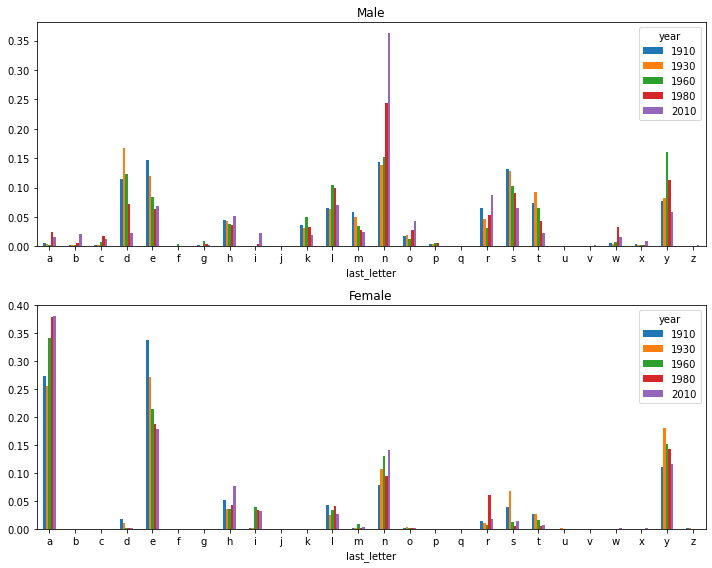

In [171]:
#마지막 글자의 비율을 연도별, 성별로 나누어 출력
fig, axes=plt.subplots(2,1, figsize=(10,8))

letter_prop['M'].plot(kind='bar', ax=axes[0], rot=0, title="Male")
letter_prop['F'].plot(kind='bar', ax=axes[1], rot=0, title="Female")
plt.tight_layout()

In [163]:
#letter_prop['M'].plot(kind='bar')
#letter_prop['F']

In [174]:
#letter_prop['M',1910]
letter_prop['M']

year,1910,1930,1960,1980,2010
last_letter,,,,,
a,0.005031,0.003252,0.002440,0.023786,0.014980
b,0.002116,0.002753,0.001834,0.005688,0.020470
c,0.002482,0.001627,0.007257,0.017046,0.012181
d,0.113858,0.166900,0.122908,0.072585,0.023387
e,0.147556,0.120163,0.083853,0.063029,0.067959
f,0.000783,0.000420,0.004325,0.000920,0.001188
g,0.002250,0.001267,0.009488,0.003673,0.001404
h,0.045562,0.043041,0.037907,0.035986,0.051670
i,0.000844,0.000633,0.000603,0.003101,0.022628


In [181]:
letter_prop=table/table.sum()
dny_ts=letter_prop.loc[['d', 'n','y'], 'M'].T
dny_ts

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405
...,...,...,...
2006,0.025075,0.351666,0.060338
2007,0.024451,0.358274,0.059634
2008,0.023574,0.361101,0.060342


<AxesSubplot:xlabel='year'>

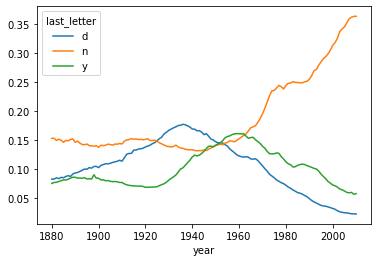

In [182]:
dny_ts.plot()